In [66]:
# Some setup for optimial latex/pdf output

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (5.0, 2.5)
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
pd.set_option('display.latex.repr',True)
pd.set_option('display.latex.longtable',False)
pd.set_option('display.latex.escape',False)
import sympy
sympy.init_printing(use_latex=True)

from IPython.display import Image, Latex

from PIL import Image
def read_images(paths):
    return [Image.open(i).convert("RGBA") for i in paths]
def images_hconcat(images, width=700,height=700, 
                   gap=0,aspaths=True):
    images = read_images(images) if aspaths else images
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths) + gap*len(images)
    max_height = max(heights)
    new_im = Image.new('RGBA', (total_width, max_height))
    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset,0),mask=im)
        x_offset += im.size[0] + gap
    new_im.thumbnail((width,height), Image.ANTIALIAS)
    return new_im
def images_vconcat(images, width=700,height=700, 
                   gap=0, aspaths=True):
    images = read_images(images) if aspaths else images
    widths, heights = zip(*(i.size for i in images))
    max_width = max(widths)
    total_height = sum(heights) + gap*len(images)
    new_im = Image.new('RGBA', (max_width, total_height))
    y_offset = 0
    for im in images:
        new_im.paste(im, (0,y_offset),mask=im)
        y_offset += im.size[1] + gap
    new_im.thumbnail((width,height), Image.ANTIALIAS)
    return new_im
def images_tblconcat(pathtbl,width=700,height=700,
                     aspaths=True,hgap=0,vgap=0):
    himages = [images_hconcat(paths,gap=hgap,aspaths=aspaths) for paths in pathtbl]
    new_im = images_vconcat(himages,gap=vgap,aspaths=False)
    new_im.thumbnail((width,height), Image.ANTIALIAS)
    return new_im

# Introduction

## Thin Film Formation

The growth of thin films (up to several micrometers thick) on substrates is of broad scientific interest for a number of reasons:

1. The inherently small amount of material required offers the potential for manufacturing low-cost, lightweight and mechanically flexible devices.
2. Interfacial (epitaxial) constraints and film thickness offer additional control parameters for the material's properties and, furthermore, can lead to entirely new and divergent properties from the equivalent bulk material (for example mutliferroic materaials).

Corrosion scale formation can be viewed as a sub-category of thin film growth, whereby the substrate cannot be treated as a static interface on which the film grows. Instead the film compound emerges *via* a reaction of species from both the substrate and local environment. This formation process means that the growth rate of the scale will be limited by not only the reaction (formation) and dissociation (dissolution) kinetics of these species, but also their ability to move through the scale to a reaction site. Typically this leads to a diminishing growth rate with scale thickness and, eventually, a steady-state film system of approximately constant thickness. Finally, random local perturbations to this steady-state, if not rectified, may accumulate and lead to local breakdown of the scale or it's detachment from the substrate. In some cases, the change in local chemistry at these breakdown sites can lead to accelerated substrate dissolution (known as pitting) and crack formation. This corrosion scale 'life-cycle' is depicted in \cref{fig:scale_stages}.

For many technological applications, the stability of the substrate material is crucial. Thus a *good* corrosion system is one that limits the amount of reacted substrate material, requiring that:

1. The film provides a high barrier to species diffusion at low thicknesses.
2. The film is strongly adherent to the substrate.
3. The film is resistant to local perturbations.

\todo[inline]{The film structure and composition may be strongly influenced by environmental parameters (temperature, pressure, ...),...}

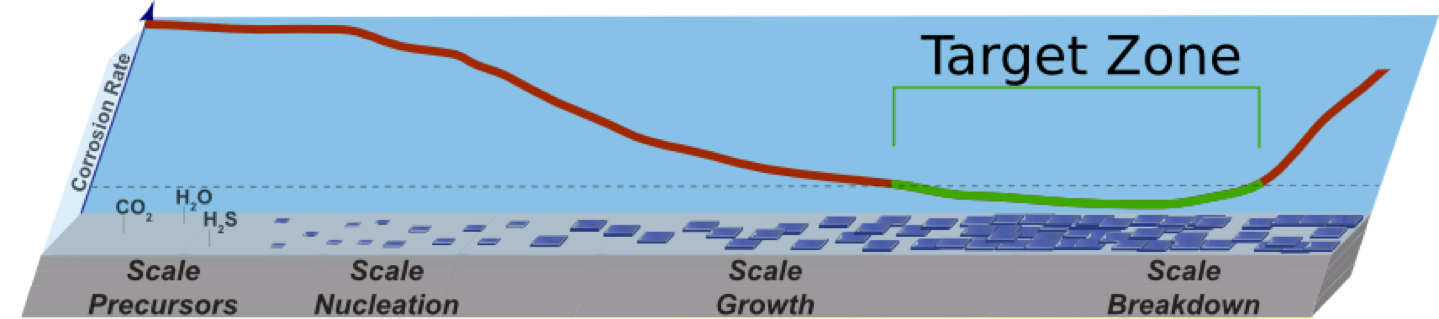

In [16]:
Image('images/introduction/corrosion_scale_stages.png',width=600)

## Iron Sulfide Scale Formation

\cite{zelenyak_molecular_2016}

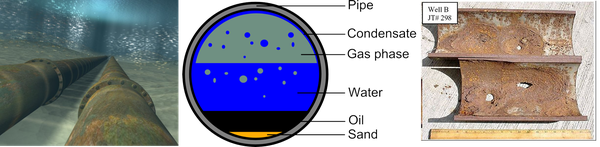

In [81]:
images_hconcat(['images/introduction/pipeline.png',
               'images/introduction/pipe_schematic.png',
               'images/introduction/pipe_failure.png'],gap=10,width=600)

\todo[inline]{talk about strongly correlated materials}

In [33]:
df = pd.DataFrame(np.random.rand(3,4),columns=['a','b','c','d'])
df.a = ['$\delta$','x','y']
df.b = ['l','m','n']
#df.set_index(['a','b'])
df.round(3)

,a,b,c,d
0,$\delta$,l,0.067,0.049
1,x,m,0.408,0.771
2,y,n,0.867,0.189


a b c

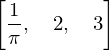

In [65]:
import sympy
sympy.init_printing(use_latex=True)
a  = sympy.sympify([1/sympy.pi,2,3])
a